In [1]:
import numpy as np
import seaborn as sns

sns.set_palette("muted")
sns.set_style("whitegrid")

In [2]:
def generate_mix(n, ratios, params_list):
    rnorms = [
        np.random.normal(params[0], params[1], round(n * ratio))
        for params, ratio in zip(params_list, ratios)
    ]
    mix = np.concatenate(rnorms)
    np.random.shuffle(mix)
    return mix

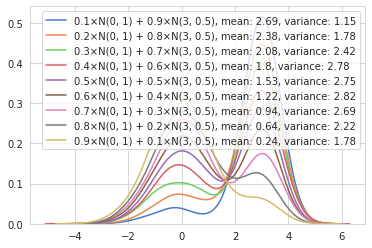

In [3]:
n = 1000
ratios_list = [
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.4, 0.6],
    [0.5, 0.5],
    [0.6, 0.4],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.9, 0.1],
]
params_list = [(0, 1), (3, 0.5)]
mixes = []

for ratios in ratios_list:
    mix = generate_mix(n, ratios, params_list)
    mixes.append(mix)
    mix_strs = [
        f"{ratio}×N({params[0]}, {params[1]})"
        for params, ratio in zip(params_list, ratios)
    ]
    mix_legend = (
        " + ".join(mix_strs)
        + f", mean: {round(np.mean(mix), 2)}, variance: {round(np.var(mix), 2)}"
    )
    _ = sns.kdeplot(mix, bw=0.5, label=mix_legend)

In [4]:
def sprt(alpha, beta, mean0, mean1, values):
    upper_critical = np.log((1 - beta) / alpha)
    lower_critical = np.log(beta / (1 - alpha))
    variance = np.var(values)
    cumulative_sum = 0
    step = 0
    while cumulative_sum > lower_critical and cumulative_sum < upper_critical:
        x = values[step]
        cumulative_sum += log_likelihood(x, mean0, mean1, variance)
        step += 1
    decision = "H1" if cumulative_sum >= upper_critical else "H0"
    return (decision, step)

In [5]:
def log_likelihood(x, mean0, mean1, variance):
    result = (np.square(x - mean0) - np.square(x - mean1)) / (2 * variance)
    return result

In [6]:
alpha = 0.05  # Type I error (false positive) rate - rejection of a true null hypothesis
beta = 0.2  # Type II error (false negative) rate - non-rejection of a false null hypothesis
mean0 = 1  # H0: mean = mean0
mean1 = 2  # H1: mean = mean1

In [7]:
for ratios, mix in zip(ratios_list, mixes):
    decision, num_observations = sprt(
        alpha=alpha, beta=beta, mean0=mean0, mean1=mean1, values=mix
    )
    print(
        f"ratios: {ratios}\t-\tdecision: accept {decision}\t-\tnum observations: {num_observations}"
    )

ratios: [0.1, 0.9]	-	decision: accept H1	-	num observations: 2
ratios: [0.2, 0.8]	-	decision: accept H1	-	num observations: 9
ratios: [0.3, 0.7]	-	decision: accept H1	-	num observations: 10
ratios: [0.4, 0.6]	-	decision: accept H1	-	num observations: 6
ratios: [0.5, 0.5]	-	decision: accept H0	-	num observations: 5
ratios: [0.6, 0.4]	-	decision: accept H0	-	num observations: 3
ratios: [0.7, 0.3]	-	decision: accept H0	-	num observations: 5
ratios: [0.8, 0.2]	-	decision: accept H0	-	num observations: 2
ratios: [0.9, 0.1]	-	decision: accept H0	-	num observations: 2


Both H0 and H1 are expectedly accepted when population mean is closer to the respective hypothesis mean.

In [8]:
h0_decisions = []
h1_decisions = []

for ratios in ratios_list:
    print(f"\nRatios: {ratios}")
    for i in range(1000):
        for mix in mixes:
            np.random.shuffle(mix)
            decision, num_observations = sprt(
                alpha=alpha, beta=beta, mean0=mean0, mean1=mean1, values=mix
            )
            if decision == "H0":
                h0_decisions.append(num_observations)
            else:
                h1_decisions.append(num_observations)

    h0_avg = round(sum(h0_decisions) / len(h0_decisions), 2)
    h1_avg = round(sum(h1_decisions) / len(h1_decisions), 2)
    print(f"H0 average num_observations: {h0_avg}")
    print(f"H1 average num_observations: {h1_avg}")


Ratios: [0.1, 0.9]
H0 average num_observations: 7.86
H1 average num_observations: 9.93

Ratios: [0.2, 0.8]
H0 average num_observations: 7.82
H1 average num_observations: 9.86

Ratios: [0.3, 0.7]
H0 average num_observations: 7.81
H1 average num_observations: 9.85

Ratios: [0.4, 0.6]
H0 average num_observations: 7.82
H1 average num_observations: 9.88

Ratios: [0.5, 0.5]
H0 average num_observations: 7.82
H1 average num_observations: 9.87

Ratios: [0.6, 0.4]
H0 average num_observations: 7.81
H1 average num_observations: 9.88

Ratios: [0.7, 0.3]
H0 average num_observations: 7.81
H1 average num_observations: 9.87

Ratios: [0.8, 0.2]
H0 average num_observations: 7.81
H1 average num_observations: 9.88

Ratios: [0.9, 0.1]
H0 average num_observations: 7.83
H1 average num_observations: 9.88


With $\alpha$ = 0.05 and $\beta$ = 0.2 we are more cautious to reject a true null hypothesis rather than to not reject a false one, hence as we can see on average SPRT evaluates less observations to accept H0 than to accept H1.

Another observation is that amount of observations before accepting either of hypotheses on average does not depend on distributions ratios.